In [82]:
import numpy as np
from matplotlib import pyplot as plt
n = 3

def error(M, A):
    return np.sum(np.square(M-A))

A = np.array([ [9., 3., 6.],
               [8., 8., 6.],
               [0., 3., 7.]])
U, d, V = np.linalg.svd(A, full_matrices=True)
U = np.transpose(U)

print("d:")
print(d)
print("\nU:")
print(U)
print("\nV:")
print(V)

fullDecomposition = d[0] * np.outer(U[0] , V[0]) + \
                    d[1] * np.outer(U[1] , V[1]) + \
                    d[2] * np.outer(U[2] , V[2])
approxs = [d[i] * np.outer(U[i] , V[i]) for i in range(n)]

errorSvd = error(fullDecomposition, A)
print("error svd    : %f"  % errorSvd)
for i in range(n):
    errorApprox = error(approxs[i], A)
    print("approximation %i error    : %f"  % (i, errorApprox))

d:
[17.50141313  5.57467581  3.25937543]

U:
[[-0.61697692 -0.71984297 -0.31806537]
 [ 0.37159783  0.08979484 -0.92404109]
 [ 0.69372511 -0.68830443  0.21209075]]

V:
[[-0.6463213  -0.48932452 -0.58551711]
 [ 0.72878483 -0.1684351  -0.66370346]
 [ 0.22614475 -0.85568167  0.46547548]]
error svd    : 0.000000
approximation 0 error    : 41.700539
approximation 1 error    : 316.922990
approximation 2 error    : 337.376472


In [83]:
import pandas as pd

In [84]:
items = pd.read_csv("Tables/18072022ItemsFAKE.csv")
sales = pd.read_csv("Tables/18072022SalesFAKE.csv")

In [85]:
mergedSales = sales.merge(items, on='Id', how='right')

In [86]:
table = pd.pivot_table(mergedSales, index='feature-G', columns='feature-C', values='Quantity')
table.fillna(0,inplace=True)

In [87]:
A = table.values

In [88]:
import numpy as np

def error(M, A):
    return np.sum(np.square(M-A))

U, d, V = np.linalg.svd(A, full_matrices=True)
U = np.transpose(U)

print("d:")
print(d)
print("\nU:")
print(U)
print("\nV:")
print(V)

n = len(U)
m = len(V)

fullDecomposition = d[0] * np.outer(U[0] , V[0]) + \
                    d[1] * np.outer(U[1] , V[1]) + \
                    d[2] * np.outer(U[2] , V[2])
approxs = [d[i] * np.outer(U[i] , V[i]) for i in range(n)]

errorSvd = error(fullDecomposition, A)
print("error svd    : %f"  % errorSvd)
for i in range(n):
    errorApprox = error(approxs[i], A)
    print("approximation %i error    : %f"  % (i, errorApprox))

d:
[57.81129261 57.52510984 57.31691923 56.82024278 53.53694355 27.32413764
 26.76402204 26.73093355 26.50512882 26.49638291 25.12255741 24.93360745
 23.37457347 17.88579129 14.35728084 13.33388988 13.11548911  9.85610211
  8.96298329  8.77717673  8.31011186  7.84076258  7.80226143  7.68114575
  6.55743852  6.27547355  5.99045601  5.74624145  5.69295734  5.52712829
  5.46932753  4.58257569  4.          2.02311028  1.76666558  1.73205081
  1.73205081  1.73205081  1.41421356]

U:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

V:
[[ 0.00000000e+00  0.00000000e+00  1.72976586e-02 ...  6.91906342e-02
   1.00698945e-17  1.72976586e-02]
 [ 0.00000000e+00  4.63402255e-20 -1.74976329e-17 ... -7.81033740e-17
   3.66920096e-20 -1.95258435e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  1.06160348e-22 -1.

In [92]:
bestE = np.inf
bestU = None
bestV = None
bestd = None
errs = []
reproductions = 10

for _ in range(reproductions):
    UU = np.random.rand(n)
    UU = (1.0 / np.sqrt(error(UU, 0))) * UU
    VV = np.random.rand(m)
    VV = (1.0 / np.sqrt(error(VV, 0))) * VV
    for dd in np.linspace(0.1, 10, num=100):
        app = dd * np.outer(UU,VV)
        err = error(app, A)
        errs.append(err)
        if err < bestE:
            bestE = err
            bestU = UU 
            bestV = VV
            bestd = dd
print("error svd    : %f"  % errorSvd)
print("svd approximation %i error    : %f"  % (i, error(approxs[0], A)))
print("smallest error random : %f"  % bestE)

error svd    : 13156.129139
svd approximation 38 error    : 19750.496631
smallest error random : 22750.511549


In [94]:
error(np.zeros_like(A), A)

23092.642184285192

In [ ]:
bestd * np.outer(bestU , bestV)

In [ ]:
approx

In [ ]:
error(bestU, 0)

In [129]:
params = {
  'axes.labelsize': 20,
  'font.size': 18,
  'legend.fontsize': 12,
  'xtick.labelsize': 20,
  'ytick.labelsize': 20,
  'text.usetex': True,
  'figure.figsize': [8, 6],
  'text.latex.preamble': r'\usepackage{amsmath} \usepackage{amssymb}',
   }
plt.rcParams.update(params)

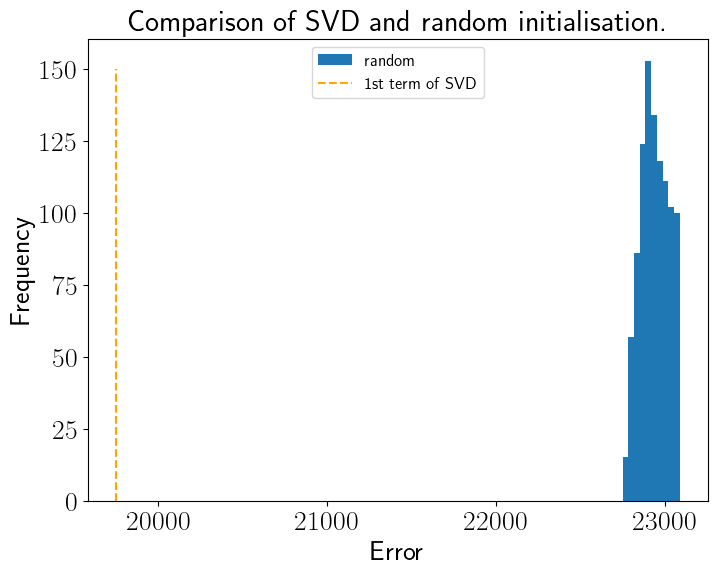

In [133]:
plt.hist(errs, label="random")
plt.vlines(error(approxs[0], A), ymin=0, ymax=150, color="orange", label="1st term of SVD", linestyle="dashed")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Comparison of SVD and random initialisation.")
plt.legend(loc="upper center")
plt.savefig("svd-results.pdf")
plt.show()
plt.close()